# Predicting heart disease using machine learning
This notebook looks into various Python based machine learning and data science libraries in an attempt to build a machina learning model capable of predicting whether or not someone has heart disease based on their medical attributes.

1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experiments

## 1. Problem Definition 

In a statement,
> Given clinical parameters about a patient, can we predict whether or not they have heart disease

## 2. Data

The original data come from the Cleaveland data from the UCI Machine learning Repository.  
https://archive.ics.uci.edu/dataset/45/heart+disease

There is also a version of it availavle on Koggle.  
https://www.kaggle.com/datasets/heptapod/uci-ml-datasets

## 3. Evaluation

> If we can reach 95 accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue the project.

## 4. Features

**Create data dictionary

* id (Unique id for each patient)  * 
age (Age of the patient in years
* 
origin (place of stud  y* )
sex (Male/Fema
* e)
cp chest pain type ([typical angina, atypical angina, non-anginal, asymptomat
* c])
trestbps resting blood pressure (resting blood pressure (in mm Hg on admission to the hospi
* al))
chol (serum cholesterol in 
* g/dl)
fbs (if fasting blood sugar > 120
* mg/dl)
restecg (resting electrocardiographic 
* esults)
-- Values: [normal, stt abnormality, lv hyp
* rtrophy]
thalach: maximum heart rat
*  achieved
exang: exercise-induced angina (T
* ue/ False)
oldpeak: ST depression induced by exercise rela
* ive to rest
slope: the slope of the peak exerci
* e ST segment
ca: number of major vessels (0-3) colored 
* y fluoroscopy
thal: [normal; fixed defect; rev
* rsible defect]
num: the predicted attribute


## Preparing the tools
We are going to use pandas, Matplotlib, and NumPy for data analysis and manipulation

In [1]:
# Import all the tools we need

#Regular EDA (explatory data analysis) and plotting libraires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Models from Scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay, roc_curve, auc



## Load Data

In [2]:
df = pd.read_csv('heart-disease.csv')
df.shape

(303, 14)

## Data Exploration (explotary data analysis or EDA)

The goal is here to find more about data and become a subject matter export on the data

1. What questions are you trying to solve
2. What kind of data do we have and how do we treat different types?
3. What's missing from the data and how do you deal with it?
4. Where are the outliers and why should you care about them?
5. How can you add, change or remove features to get more out of your data?

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
# Lets find out how many of each class there
df['target']. value_counts()

target
1    165
0    138
Name: count, dtype: int64

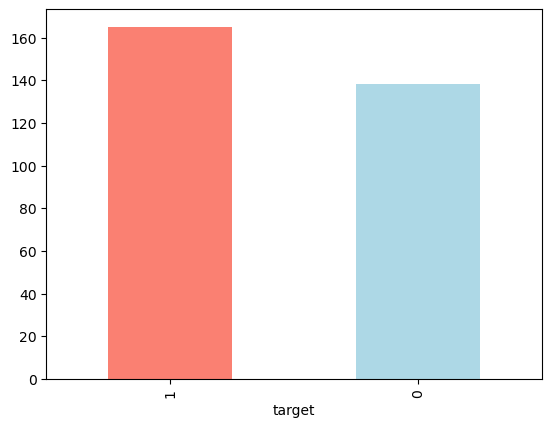

In [5]:
df['target'].value_counts().plot(kind='bar', color=['salmon', 'lightblue']);

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
# Are there any missing values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart Disease frequency accoridng to sex

In [9]:
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [10]:
crosstab = pd.crosstab(df.target, df.sex)
crosstab

sex,0,1
target,,
0,24,114
1,72,93


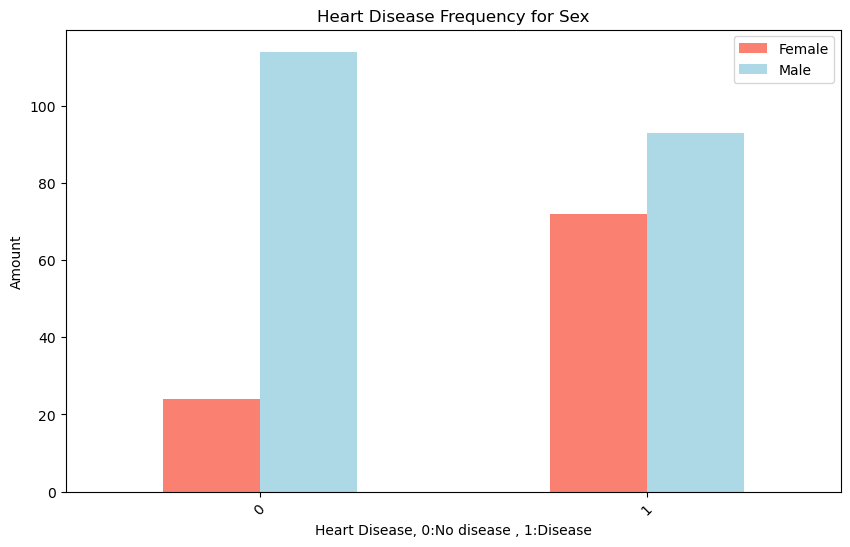

In [11]:
crosstab.plot(kind="bar", figsize=[10, 6], color=['salmon', 'lightblue']);

plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Heart Disease, 0:No disease , 1:Disease');
plt.ylabel('Amount');
plt.legend(['Female', 'Male']);
plt.xticks(rotation=45);

### Age vs. MAx Heart Rate for Heart Disease

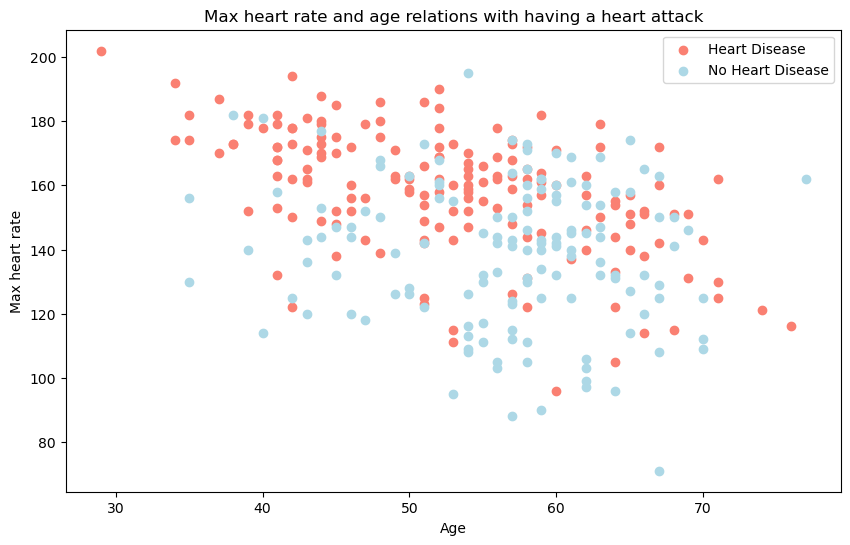

In [12]:
# Create another figure

plt.figure(figsize=(10,6))

# Scatter with positive examples

plt.scatter(df.age[df.target==1], df.thalach[df.target==1], c=['salmon'])

# Scatter with negative examples

plt.scatter(df.age[df.target==0], df.thalach[df.target == 0], c='lightblue')

#Add some helpful info
plt.title("Max heart rate and age relations with having a heart attack")
plt.xlabel('Age')
plt.ylabel('Max heart rate')
plt.legend(['Heart Disease', 'No Heart Disease']);

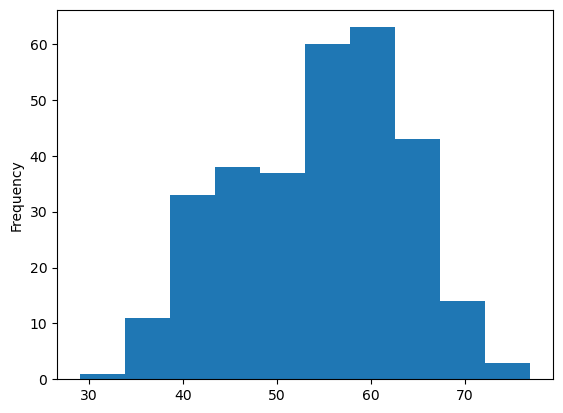

In [13]:
# Check the distribution of the age column with a histogram

df.age.plot.hist();

### Heart Disease Frequency Per Chest Pain Type

In [14]:
cp = pd.crosstab(df.cp, df.target)
cp

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


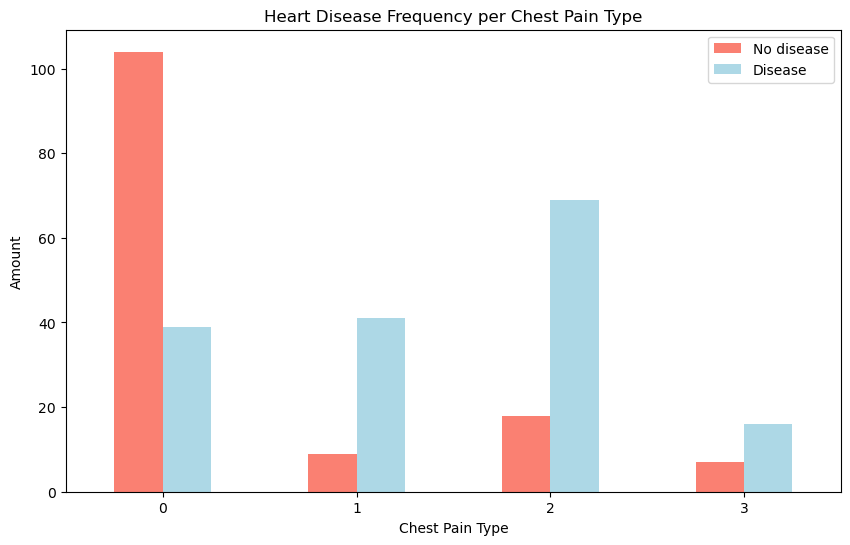

In [15]:
# Make the crosstab more visual

cp.plot(kind='bar', figsize=[10, 6], color=['salmon', 'lightblue']);

# Add some communication

plt.title('Heart Disease Frequency per Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.ylabel('Amount')
plt.legend((['No disease', 'Disease']))
plt.xticks(rotation=0);

(14.5, -0.5)

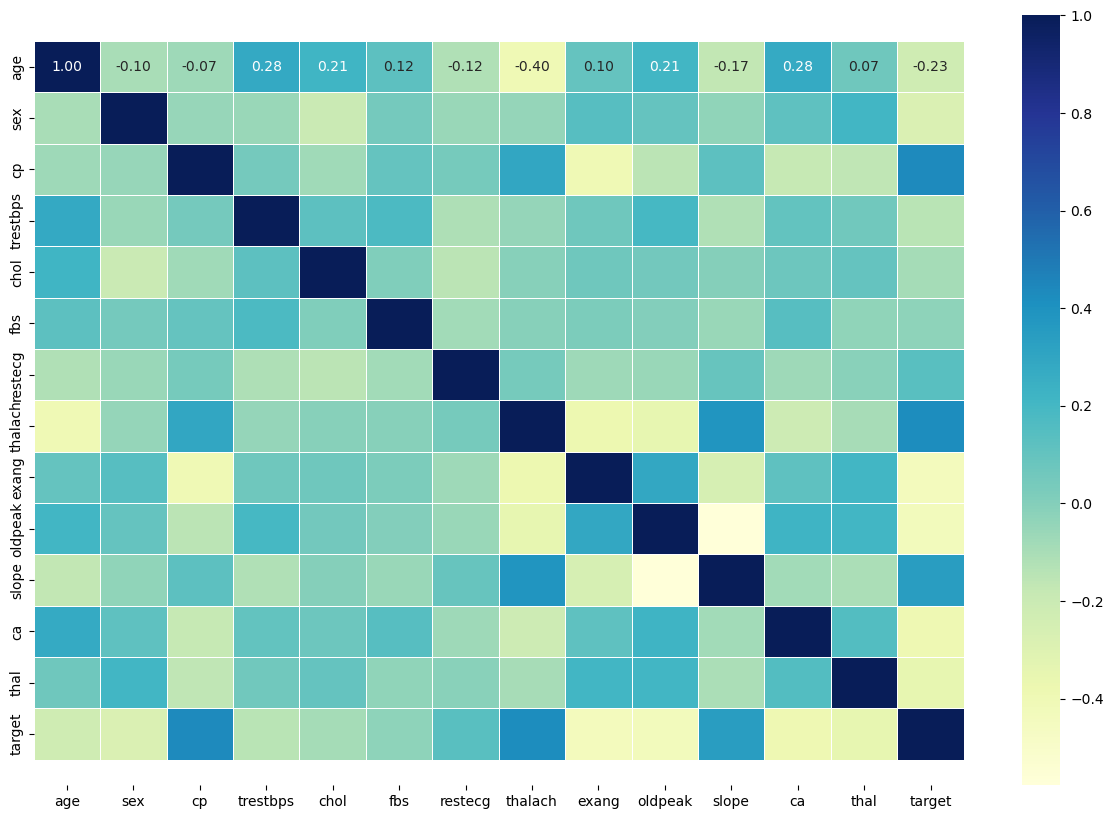

In [16]:
 # Lets make our correlation matrix readable
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix, annot=True, linewidths=0.5, fmt='.2f', cmap='YlGnBu')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top- 0.5)

# Modelling

In [17]:
X=df.drop('target', axis=1)
y=df.target

X_train, X_test, y_train, y_test = train_test_split(X, y)


We splitted the data into train and test
we are going to try 3 machine learning models

1. Logistic Regression
2. K-Nearest Neighbors Classifier
3. Random Forest Regression

In [18]:
# Put models in a dictionary
models = {
    'LogisticRegression':LogisticRegression(),
    'KNN': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier()
}

# Create a function to fit and score models
def fit_and_scores(models, X_train, X_test, y_train, y_test) :
    """
    Fit and score the given model.
    Models is a dict of different Scikit-learn machine learning models
    X_train : training data (no labels)
    X_test : testing data
    y_train :training labels
    y_test : testing labels
    """
    # Set random seed
    np.random.seed(42)

    # Make a dictionary to keep model scores
    model_scores ={}
    
    # Loop through models
    for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [19]:
model_scores = fit_and_scores(models=models, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)
model_scores

C:\Users\yusuf\Desktop\software_development\December\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'LogisticRegression': 0.8552631578947368,
 'KNN': 0.618421052631579,
 'Random Forest': 0.868421052631579}

### Model Comparison

<Axes: >

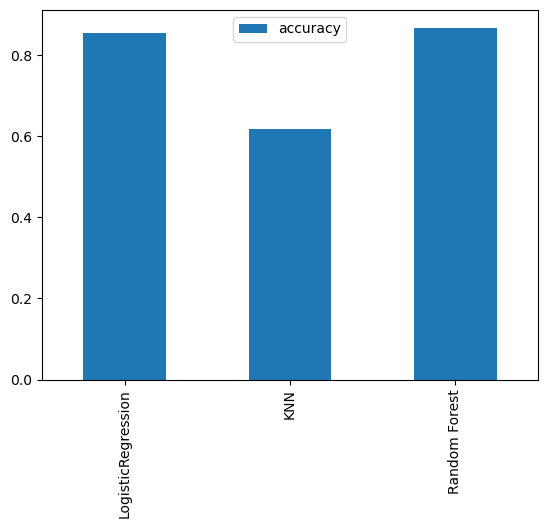

In [20]:
model_compares = pd.DataFrame(model_scores, index=['accuracy'])
model_compares.T.plot.bar()

Now we've got a baseline model... and we know a model's first predictions aren't always what we should based our next steps off.
What should do?

Let's look at the following:
* Hyperparameter tuning
* Feature importance
* Confusion matrix
* Cross-validation
* Precision
* Recall
* F1 score
* Classification Report
* ROC curve
* Area under the curve(AUC)

# Hyper Parameter Tuning

In [21]:
# Let's tune KNN
test_scores=[]
train_scores=[]

# Create a list of different values for n_neighbors
neighbors = range(1, 21)

# Setup KNN instance 

knn = KNeighborsClassifier()

for i in neighbors:
    knn.set_params(n_neighbors = i)
    knn.fit(X_train, y_train)
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))

test_scores, train_scores

([0.4868421052631579,
  0.5131578947368421,
  0.6052631578947368,
  0.618421052631579,
  0.618421052631579,
  0.6447368421052632,
  0.6973684210526315,
  0.6710526315789473,
  0.75,
  0.6842105263157895,
  0.7236842105263158,
  0.6842105263157895,
  0.7236842105263158,
  0.6973684210526315,
  0.7236842105263158,
  0.7236842105263158,
  0.7368421052631579,
  0.6842105263157895,
  0.6973684210526315,
  0.7105263157894737],
 [1.0,
  0.8149779735682819,
  0.7973568281938326,
  0.7797356828193832,
  0.7797356828193832,
  0.7533039647577092,
  0.7136563876651982,
  0.6960352422907489,
  0.6960352422907489,
  0.7048458149779736,
  0.6916299559471366,
  0.6916299559471366,
  0.7048458149779736,
  0.6872246696035242,
  0.7048458149779736,
  0.7048458149779736,
  0.7048458149779736,
  0.7224669603524229,
  0.7092511013215859,
  0.7136563876651982])

Maximum KNN score on the test data: 75.00%


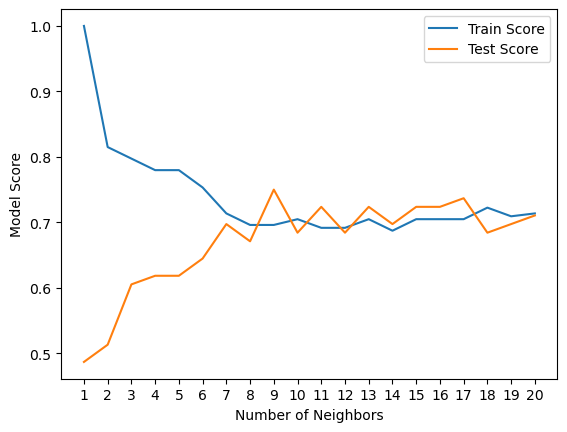

In [22]:
plt.plot(neighbors, train_scores, label="Train Score")
plt.plot(neighbors, test_scores, label="Test Score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of Neighbors")
plt.ylabel("Model Score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%");

## Hyper parameter tuning with RandomizedSearchCV

We're going to tune:

    * LogisticRegression()
    * RandomForestClassifier()
usingRandomizedSearchCV

In [23]:
# Create a hyperparameter grid for LoisticRegression

log_reg_grid = {
    'C': np.logspace(-4, 4, 20),
    'solver': ['liblinear']
}

# Create a hyperparameter grid for RandomForestClassifier

rf_grid = {
    "n_estimators": np.arange(10, 100, 50),
    "max_depth": [None, 3, 5, 10],
    "min_samples_split": np.arange(2, 20, 2),
    "min_samples_leaf" : np.arange(1, 20, 2)
}


In [24]:
# Setup random seed
np.random.seed(42)

#Setup random hyperparameter search for RandomForestClassifier
log_reg_model = RandomizedSearchCV(
    LogisticRegression(),
    param_distributions = log_reg_grid,
    n_iter = 20,
    cv = 5
)

# Fit random hyperparameter search model for RandomForestClassifier
log_reg_model.fit(X_train, y_train);



In [25]:
log_reg_model.best_params_, log_reg_model.score(X_test, y_test)

({'solver': 'liblinear', 'C': 0.23357214690901212}, 0.8947368421052632)

In [26]:
# Setup random seed
np.random.seed(42)

#Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(
    RandomForestClassifier(),
    param_distributions=rf_grid,
    n_iter = 20,
    cv=5
)

rs_rf.fit(X_train, y_train)
rs_rf.best_params_, rs_rf.score(X_test, y_test)

({'n_estimators': 60,
  'min_samples_split': 12,
  'min_samples_leaf': 11,
  'max_depth': None},
 0.881578947368421)

## Hyperparameter Tuning Using GridSearchCV()

Since our LogisticRegression model provides the best scores so far, we'll try and improve them again using GridSearchCV

In [27]:
# Different hyperparameters for our LogisticRegression model

log_reg_grid = {
    'C': np.logspace(-4, 4, 30),
    'solver':['liblinear']
}

# 
gs_log_reg = GridSearchCV(
    LogisticRegression(),
    param_grid = log_reg_grid,
    cv=5
)

gs_log_reg.fit(X_train, y_train)
gs_log_reg.best_params_, gs_log_reg.score(X_test, y_test)
y_test.reshape(1, -1)

AttributeError: 'Series' object has no attribute 'reshape'

## Evaluating our tuned machine learning classifier, beyond accuracy

* ROC curve and AUC score
* Confusion Matrix
* Classification Reports
* Precision
* Recall
* F1-score

... and it would be great if cross validation was used where possible

To make comparisons and evaluate our trained model, we first need to make predisctions.

In [28]:
# Make predictions
y_preds = gs_log_reg.predict(X_test)

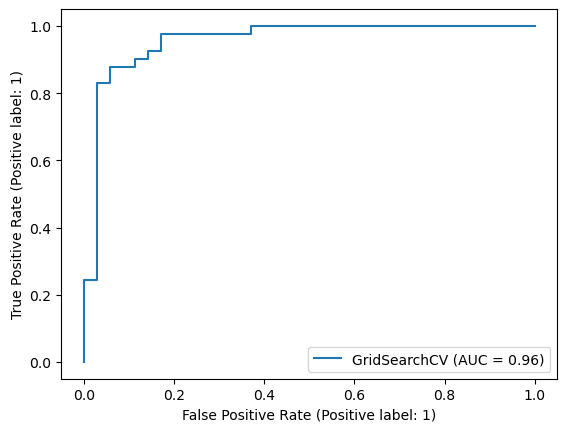

In [29]:
# Plot ROC curve and calculate AUC metric
#fpr, tpr, thresholds = roc_curve(y_test, y_preds)
#roc_auc = auc(fpr, tpr)
#display = RocCurveDisplay.from_predictions(y_test, y_preds)
display = RocCurveDisplay.from_estimator(gs_log_reg, X_test, y_test)


## Confusion Matrix

In [30]:
confusion_matrix(y_test, y_preds)


array([[29,  6],
       [ 2, 39]], dtype=int64)

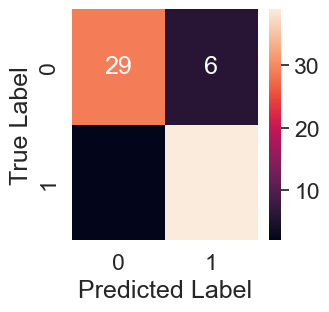

In [31]:
sns.set(font_scale = 1.5)

def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap
    """
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds, labels=[0,1]), annot=True, cbar=True)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

plot_conf_mat(y_test, y_preds)



Now we've got a ROC curve, an AUC metric and a confusion matrix, let's get a classification report as well as cross-validated precision, recall, f1 score.

In [32]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.94      0.83      0.88        35
           1       0.87      0.95      0.91        41

    accuracy                           0.89        76
   macro avg       0.90      0.89      0.89        76
weighted avg       0.90      0.89      0.89        76



### Calculate evaluation metrics using cross-validation

We're going to calculate precision, recall and f1-score of our model using cross-validation and to do so we'll be using `cross_val_score()` .

In [33]:
# Check best hyperparameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [34]:
# Create a new classifier with best parameters
clf = LogisticRegression(C= 0.20433597178569418, solver= 'liblinear')


In [35]:
# Cross-validated accuracy
cv_accuracy = cross_val_score(
    clf,
    X,
    y,
    cv=5,
    scoring = 'accuracy'
)
cv_accuracy = cv_accuracy.mean()
cv_accuracy

0.8446994535519124

In [36]:
# Cross-validated precision
# Cross-validated precision
cv_precision = cross_val_score(
    clf,
    X,
    y,
    cv=5,
    scoring = 'precision'
)
cv_precision = cv_precision.mean()
cv_precision

0.8207936507936507

In [37]:
# Cross-validated recall
# Cross-validated recall
cv_recall = cross_val_score(
    clf,
    X,
    y,
    cv=5,
    scoring = 'recall'
)
cv_recall = cv_recall.mean()
cv_recall

0.9212121212121213

In [38]:
# Cross-validated f1-score
# Cross-validated f1
cv_f1 = cross_val_score(
    clf,
    X,
    y,
    cv=5,
    scoring = 'f1'
)
cv_f1 = cv_f1.mean()
cv_f1

0.8673007976269721

<Axes: title={'center': 'Cross-validated classification metrics'}>

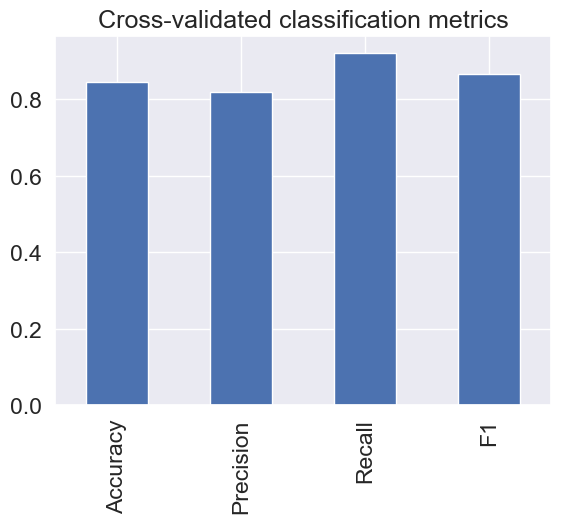

In [39]:
# Visualize cross-validated metrics
cv_metrics = pd.DataFrame({
    "Accuracy": cv_accuracy,
    "Precision": cv_precision,
    "Recall": cv_recall,
    "F1": cv_f1
}, index=[0])

cv_metrics.T.plot.bar(title="Cross-validated classification metrics", legend = False)

<Axes: title={'center': 'Cross-validated classification metrics'}>

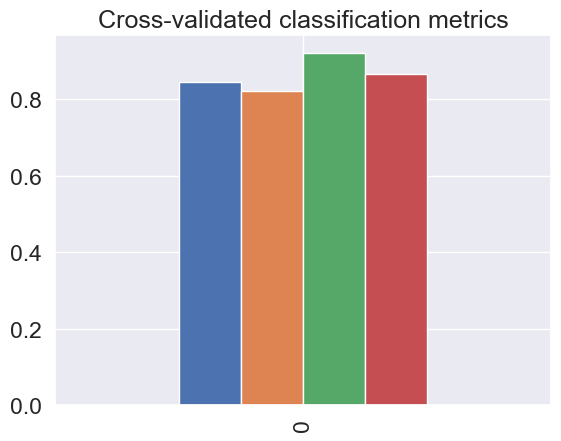

In [40]:
cv_metrics.plot.bar(title="Cross-validated classification metrics", legend = False)


## Feature Importance


Feature importance is another as asking "which features contributed most to the outcomes of model and how did they contribute?"

Finding feature importance is different for eact machine learning model. One way o find importance is to search for "(Model Name) feature importance"

Let's find the feature importance for our LogisticRegression model...

<Axes: ylabel='Feature'>

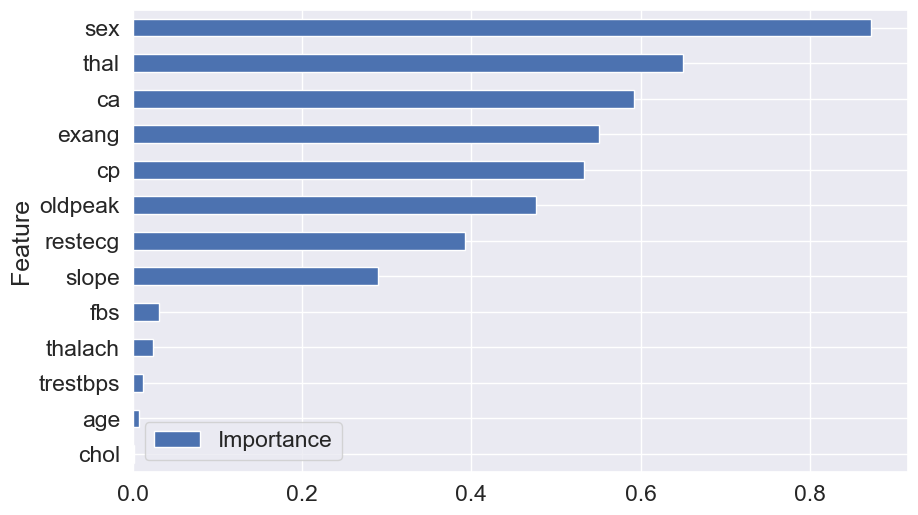

In [41]:
clf.fit(X_train, y_train)
coefficients = clf.coef_[0]

feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': np.abs(coefficients)})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))

In [42]:
pd.crosstab(df['sex'], df['target'])

target,0,1
sex,,
0,24,72
1,114,93
